In [20]:
#Load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

In [4]:
#Load the data
df = pd.read_csv(r'C:\Users\user\Desktop\cHIZZY\chizzy DATA\TEAM KERAS\Breast_cancer_data.csv')

In [5]:
#View the data
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [24]:
#Basic information and description

df.info()

df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


0

**There are 569 enries with a total of 6 columns**

In [23]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [8]:
#unique values

df['mean_radius'].unique()

df['mean_texture'].unique()

df['mean_perimeter'].unique()

df['mean_area'].unique()

df['mean_smoothness'].unique()

df['diagnosis'].unique() 

array([0, 1], dtype=int64)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'AxesSubplot' object has no attribute 'unique'

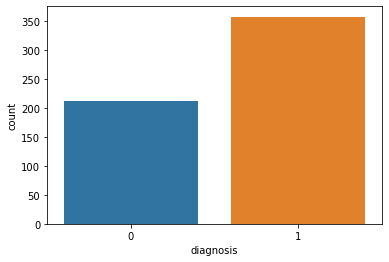

In [9]:
sns.countplot(df['diagnosis']).unique()

**In the dataset approximately 350 tumors are benign (1), while 200 tumors are malignant (0), approximately**

In [12]:
#Find null values

df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [13]:
#Datatypes

df.dtypes

mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object

In [14]:
#Filter data


df[df['diagnosis']==0].head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [15]:
df[df['diagnosis']==1].head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
19,13.540,14.36,87.46,566.3,0.09779,1
20,13.080,15.71,85.63,520.0,0.10750,1
21,9.504,12.44,60.34,273.9,0.10240,1
37,13.030,18.42,82.61,523.8,0.08983,1
46,8.196,16.84,51.71,201.9,0.08600,1


In [18]:
#Correlation

df.corr()


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


<AxesSubplot:>

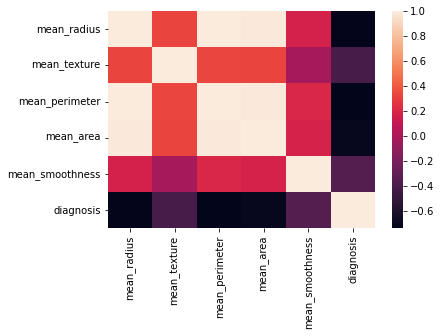

In [19]:
#Correlation with plot

sns.heatmap(df.corr())

**Positive Correlation**
* Mean_radius - mean_perimeter, mean_area

**Negative Correlation**
* Diagnosis - mean_radius, mean_perimeter, mean_area

In [38]:
df_corr = df[[
    "mean_radius",
    "mean_perimeter",
    "mean_area",
    "diagnosis"
]]

df_corr.head()

,mean_radius,mean_perimeter,mean_area,diagnosis
0,17.99,122.80,1001.0,0
1,20.57,132.90,1326.0,0
2,19.69,130.00,1203.0,0
3,11.42,77.58,386.1,0
4,20.29,135.10,1297.0,0


<AxesSubplot:>

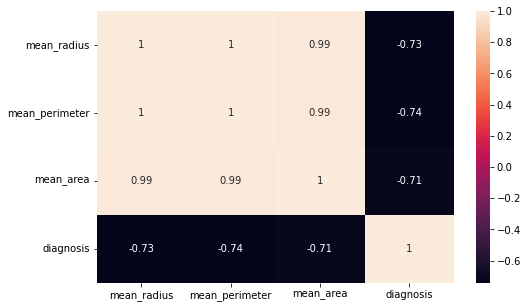

In [30]:
plt.figure(figsize=(8,5))
sns.heatmap(df_corr.corr(),annot=True)

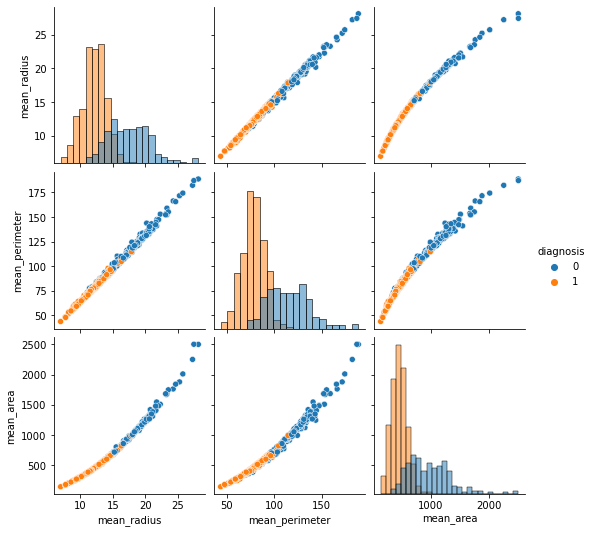

In [31]:
sns.pairplot(data=df_corr, hue='diagnosis',diag_kind='hist')

**Using only highly correlated features, the plot indicates that the probability of malignant tumors (0)  increases with high values in mean perimeter, mean radius and mean area. While the benignity of tumors (1) is associated with lower values in the mentioned features.**

<AxesSubplot:xlabel='diagnosis', ylabel='mean_perimeter'>

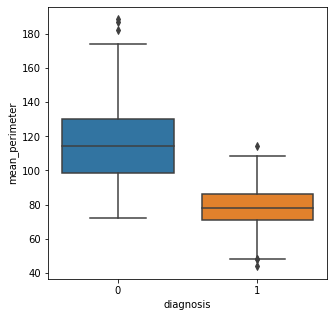

In [32]:
plt.figure(figsize=(5,5))
sns.boxplot(x='diagnosis',y='mean_perimeter',data=df_corr)

<AxesSubplot:xlabel='diagnosis', ylabel='mean_perimeter'>

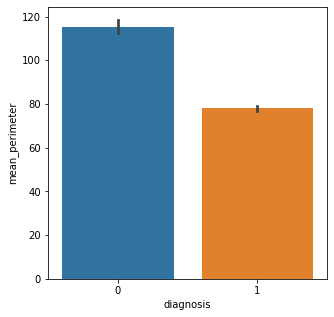

In [36]:
plt.figure(figsize=(5,5))
sns.barplot(y='mean_perimeter',x ="diagnosis",data=df_corr)

**From the plot, tumors with an average mean perimeter of 110 indicates malignity (0), while tumors with an average mean perimeter of 70 indicate benignity (1)** 

<AxesSubplot:xlabel='mean_perimeter', ylabel='mean_radius'>

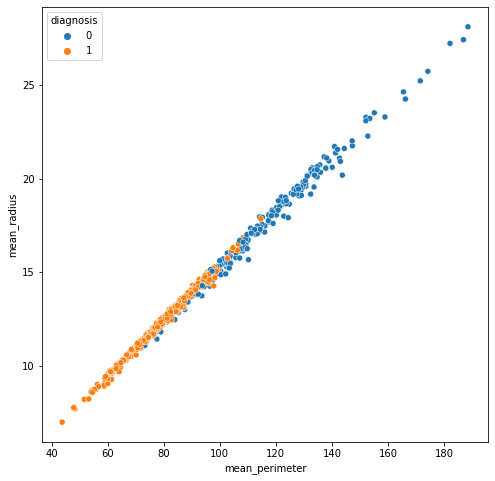

In [37]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='mean_perimeter',y='mean_radius',hue='diagnosis',data=df_corr)